In [12]:
import numpy as np
import pandas as pd
import re
import scipy as sp
import scipy.stats
pd.options.mode.chained_assignment = None

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [32]:
#dataset = r'/content/drive/MyDrive/Colab Notebooks/online retail data/Online Retail.xlsx'
filepath = r'/Users/macbook/Documents/DataScience/SQL/'


# Importing Dataset

In [15]:
data = pd.read_csv(filepath + 'online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
data.shape

(1067371, 8)

# Checking and cleaning data types

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [18]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

## Cleaning Data

- Total Records = 1067371
- 243007 Records have no customerID
- 824364 Records have customerID

## Clean customer ID

In [19]:
data = data.rename(columns={'Customer ID':'CustomerID'}) # rename customer ID column
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
# drop missing customer ids with price
data = data[data.CustomerID.isna()==False].reset_index(drop=True)

In [22]:
data.shape

(824364, 8)

In [23]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [24]:
# convert customerID to string
data['CustomerID'].astype(int)

0         13085
1         13085
2         13085
3         13085
4         13085
          ...  
824359    12680
824360    12680
824361    12680
824362    12680
824363    12680
Name: CustomerID, Length: 824364, dtype: int64

In [25]:
data['StockCode'].nunique()

4646

In [26]:
data['Description'].nunique()

5299

In [27]:
# Format data types
data['Invoice'] = data['Invoice'].astype(str).str.upper()
data['StockCode'] = data['StockCode'].str.upper()
data['Description'] = data['Description'].str.replace('.','').str.upper().str.strip().replace('\s+',' ',regex = True)
data['CustomerID'] = data['CustomerID'].astype(int)
data['Country'] = data['Country'].str.upper()

data.head()

/var/folders/07/659db1jj0vg_4x1csc3l9s6w0000gn/T/ipykernel_34619/152250226.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Description'] = data['Description'].str.replace('.','').str.upper().str.strip().replace('\s+',' ',regex = True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,UNITED KINGDOM
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,UNITED KINGDOM
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,UNITED KINGDOM
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,UNITED KINGDOM
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,UNITED KINGDOM


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.0,12.414574,188.976099,-80995.0,2.00,5.00,12.00,80995.0
Price,824364.0,3.676800,70.241388,0.0,1.25,1.95,3.75,38970.0
CustomerID,824364.0,15324.638504,1697.464450,12346.0,13975.00,15255.00,16797.00,18287.0


In [33]:
# Export Processed Data
data.to_csv(filepath+'OnlineRetail_Cleaned.csv', date_format = '%Y-%m-%d %H:%M', index = False)

# Handle Date time column: InvoiceDate

In [34]:
# Add time variables: 'date', 'month', 'week', and 'time' columns
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['date'] = data['InvoiceDate'].dt.strftime('%m/%d/%Y')
data['month'] = data['InvoiceDate'].dt.strftime('%B')
data['week'] = data['InvoiceDate'].dt.strftime('%A')
data['time'] = data['InvoiceDate'].dt.strftime('%H')

In [37]:
# Add total sales colume
data['TotalPrice'] = data['Quantity']*data['Price']

# Analysis

In [38]:
# Calculate the total sales by month
data.groupby('month').agg({'TotalPrice': 'sum'}).reset_index()

,month,TotalPrice
0,April,986682.873
1,August,1203624.460
2,December,1865023.800
3,February,925945.736
4,January,1007027.282
5,July,1137024.381
6,June,1179473.070
7,March,1215961.091
8,May,1208175.630
9,November,2267287.022


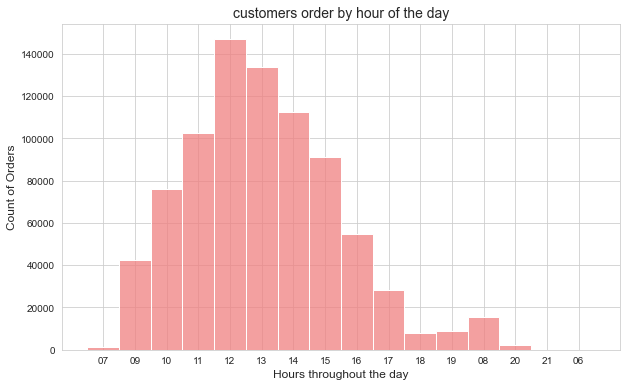

In [39]:
# Order count by hour of the day

import seaborn as sns
import matplotlib.pyplot as plt
# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('customers order by hour of the day', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()